In [117]:
import numpy as np
from numpy.random import randn
from numpy.random import rand
from numpy.random import seed
import matplotlib.pyplot as plt
from sklearn.covariance import EllipticEnvelope

In [118]:
#generate data points in a normal distribution (univariable) 

mu=1.0
sigma = 1
data1 = np.random.normal(mu,sigma,1000)

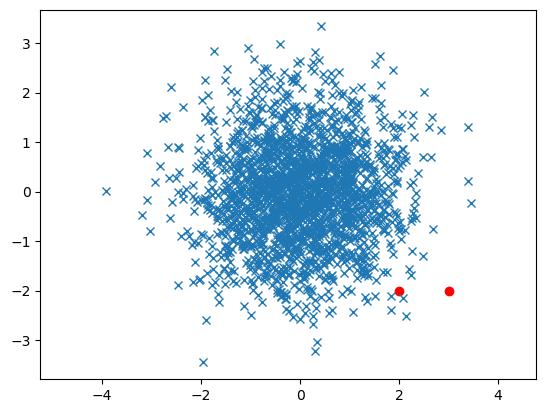

In [119]:
#  Introduce 2 anomaly points

ad =2,-2
ad2 = 3,2
mean = [0, 0]
cov = [[1, 0], [0, 1]]  # diagonal covariance
x, y = np.random.multivariate_normal(mean, cov,2000).T
plt.plot(x, y, 'x')
plt.scatter(ad[0],ad[1],c='r')
plt.scatter(ad2[0],ad[1],c='r')
plt.axis('equal')
plt.show()

In [120]:
# anomaly Detection model using EllipticEnvelope
X = data1.reshape(-1, 1)  # have to reshape the data for scikit-learn
model = EllipticEnvelope(contamination=0.01) 
model.fit(X)


EllipticEnvelope(contamination=0.01)

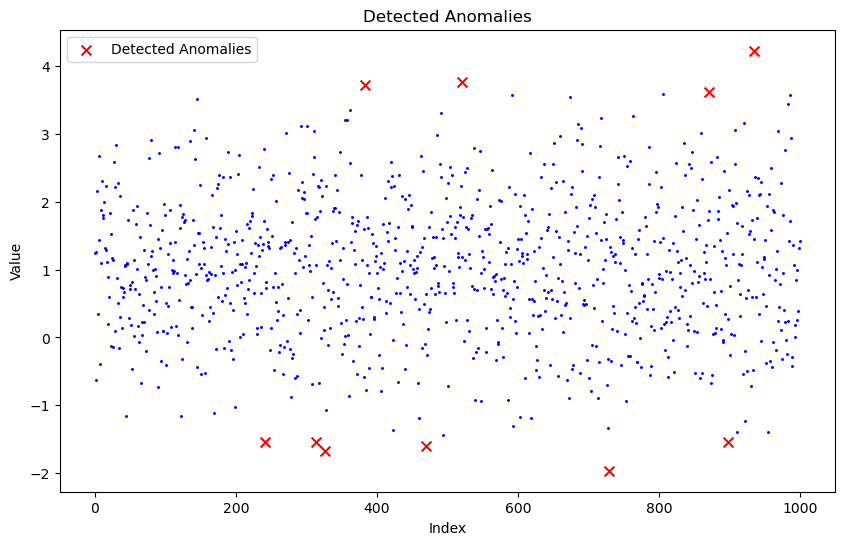

In [121]:
predictions = model.predict(X)
anomaly_indices_detected = np.where(predictions == -1)[0]

plt.figure(figsize=(10, 6))
plt.scatter(range(1000), data1, marker='.', s=5, color='blue')
plt.scatter(anomaly_indices_detected, data1[anomaly_indices_detected], marker='x', s=50, color='red', label='Detected Anomalies')
plt.title('Detected Anomalies')
plt.legend()
plt.xlabel('Index')
plt.ylabel('Value')
plt.show()